# 12장 연습문제

In [1]:
#Matplotlib 사용과 한글 처리를 위한 Code

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False  #minus 표시
mpl.rc('font', family='Malgun Gothic')
% matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["font.size"] = 14

UsageError: Line magic function `%` not found.


## 1번 Matpoltlib을 이용하여 월별 카페의 개수를 나타내는 간단한 막대 그래프(Bar Graph)를 그리는 프로그램을 작성하시오. 단, 막대 그래프의 X축 간격을 3달로 설정한다.

In [169]:
import csv

f = open('cafe_2year.csv','r', encoding = 'utf-8')

lines = csv.reader(f)

header = next(lines)

print(header)

['기준월', '카페수']


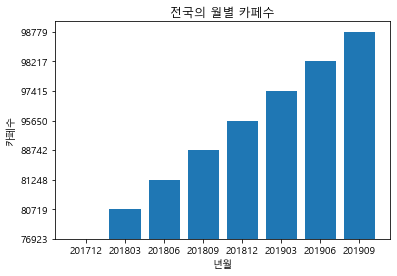

In [170]:
list_data = []

for line in lines :
    list_data.append(line[:])
    
xdata = []
ydata = []
cnt = 1

for data in list_data :
    if cnt%3 == 0 :
        xdata.append(data[0])
        ydata.append(data[1])
    cnt += 1
    
plt.title('전국의 월별 카페수')
plt.xlabel('년월')
plt.ylabel('카페수')

plt.bar(xdata, ydata)
plt.show()

f.close()

## 2번 CSV 파일을 읽어서 서울과 6개의 광역시(부산,대구,인천,대전,광주,울산)에 대해 지역, 일반의, 인턴, 레지던트, 전문의 의사 수를 출력하는 프로그램을 작성하시오.

In [84]:
import csv
import numpy as np

In [171]:
f = open('doctor_2019.csv','r', encoding = 'utf-8')
lines = csv.reader(f)

list_data = []

header = next(lines)

print(header)

['지역', '병원명', '일반의 수', '인턴 수', '레지던트 수', '전문의 수']


In [172]:
for line in lines :
    list_data.append(line[:])

doctors = {}
for data in list_data:
    if data[0] in doctors:
        doctors[data[0]][0] += int(data[2])
        doctors[data[0]][1] += int(data[3])
        doctors[data[0]][2] += int(data[4])
        doctors[data[0]][3] += int(data[5])
    else:
        doctors[data[0]] = [0,0,0,0]
        doctors[data[0]][0] = int(data[2])
        doctors[data[0]][1] = int(data[3])
        doctors[data[0]][2] = int(data[4])
        doctors[data[0]][3] = int(data[5])

locate = ['서울','부산','대구','인천','대전','광주','울산']

print('지역','일반의','인턴','레지던트','전문의')

for key in locate:
    print('%s   %d   %d   %d   %d' % (key, doctors[key][0],doctors[key][1],doctors[key][2],doctors[key][3]))

f.close()

지역 일반의 인턴 레지던트 전문의
서울   162   1196   4757   9375
부산   58   197   785   2211
대구   27   215   712   1436
인천   47   138   444   1518
대전   25   142   425   1006
광주   16   102   356   1006
울산   19   23   104   467


## 3번 2번에서 얻은 결과를 doctor2.csv 파일로 저장하는 프로그램을 작성하시오.

In [173]:
f = open('doctor2.csv','w',encoding='utf-8')

f.write('지역,일반의 수,인턴 수,레지던트 수,전문의 수\n')

for key in locate:
    f.write(key+',')
    for i in range(len(doctors[key])):
        if i == len(doctors[key])-1:
            f.write(str(doctors[key][i]))
        else:
            f.write(str(doctors[key][i])+',')
    f.write('\n')
print('doctor2.csv 파일 쓰기 완료!')
f.close()

doctor2.csv 파일 쓰기 완료!


## 4번 3번 문제에서 저장한 doctor2.csv 파일을 읽어들여 서울과 6개 광역시의 종합 병원 전문의 의사 수를 산포 그래프로 보여주는 프로그램을 작성하시오.

In [175]:
import csv

f = open('doctor2.csv', 'r', encoding='utf-8')
lines = csv.reader(f, delimiter = ',')

header = next(lines)

print(header)

list_data = []

for line in lines:
    list_data.append(line[:])
    
print(list_data)


['지역', '일반의 수', '인턴 수', '레지던트 수', '전문의 수']
[['서울', '162', '1196', '4757', '9375'], ['부산', '58', '197', '785', '2211'], ['대구', '27', '215', '712', '1436'], ['인천', '47', '138', '444', '1518'], ['대전', '25', '142', '425', '1006'], ['광주', '16', '102', '356', '1006'], ['울산', '19', '23', '104', '467']]


In [176]:
xdata = []
ydata = []

for data in list_data:
    xdata.append(data[0])
    ydata.append(int(data[1])+int(data[2])+int(data[3])+int(data[4]))

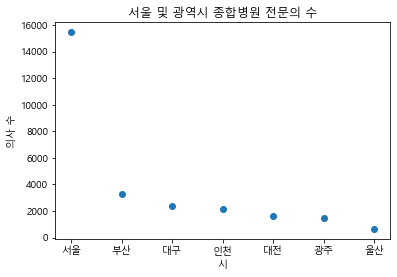

In [177]:
plt.scatter(xdata, ydata)
plt.title('서울 및 광역시 종합병원 전문의 수')
plt.xlabel('시')
plt.ylabel('의사 수')

plt.show()

f.close()

## 5번 4번 문제에서 사용한 doctor2.csv 파일을 읽어 서울과 6개 광역시의 종합병원의 일반의, 인턴, 레지던트, 전문의 의사 수를 선 그래프로 나타내는 프로그램을 작성하시오. 




In [149]:
f = open('doctor2.csv', 'r', encoding='utf-8')
lines = csv.reader(f, delimiter = ',')

header = next(lines)

list_data = []

for line in lines:
    list_data.append(line[:])
    
print(list_data)



[['서울', '162', '1196', '4757', '9375'], ['부산', '58', '197', '785', '2211'], ['대구', '27', '215', '712', '1436'], ['인천', '47', '138', '444', '1518'], ['대전', '25', '142', '425', '1006'], ['광주', '16', '102', '356', '1006'], ['울산', '19', '23', '104', '467']]


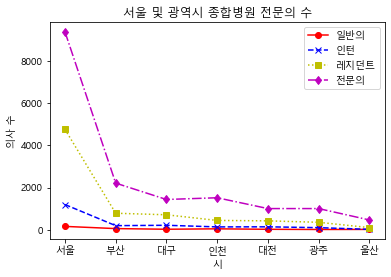

In [152]:
xdata = []
y1data = []
y2data = []
y3data = []
y4data = []

for data in list_data:
    xdata.append(data[0])
    y1data.append(int(data[1]))
    y2data.append(int(data[2]))
    y3data.append(int(data[3]))
    y4data.append(int(data[4]))

plt.plot(xdata,y1data,'ro-',label='일반의')
plt.plot(xdata,y2data,'bx--',label='인턴')
plt.plot(xdata,y3data,'ys:',label='레지던트')
plt.plot(xdata,y4data,'md-.',label='전문의')
    
    
plt.title('서울 및 광역시 종합병원 전문의 수')
plt.xlabel('시')
plt.ylabel('의사 수')
plt.legend(loc='best')

plt.show()

f.close()


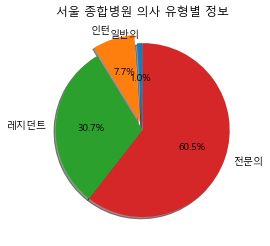

In [158]:
#6번

f = open('doctor2.csv', 'r', encoding='utf-8')
lines = csv.reader(f, delimiter = ',')

header = next(lines)

list_data = []

for line in lines:
    list_data.append(line[:])

doctor_ratio = []
kinds_of_doc = ['일반의','인턴','레지던트','전문의']
for data in list_data:
    if data[0] == '서울':
        sum=int(data[1])+int(data[2])+int(data[3])+int(data[4])
        doctor_ratio.append(int(data[1])/sum*100)
        doctor_ratio.append(int(data[2])/sum*100)
        doctor_ratio.append(int(data[3])/sum*100)
        doctor_ratio.append(int(data[4])/sum*100)

plt.title('서울 종합병원 의사 유형별 정보')
plt.pie(doctor_ratio, explode = (0,0.1,0,0), labels=kinds_of_doc,autopct='%.1f%%',shadow=True,startangle=90)
plt.show()

f.close()